In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.gaussian_process as gp

sns.set_style("darkgrid")

In [47]:
rand = np.random.RandomState(123456)

In [48]:
n = 50
w = rand.normal()
b = rand.normal(scale=5)
X = np.sort(25 * rand.rand(n))[:, np.newaxis]
eps = rand.normal(scale=0.2, size=(n))[:, np.newaxis]
y = w * X + b + eps
shuffle = rand.permutation(n)
X = X[shuffle]
y = y[shuffle]
X_train = X[:-10]
y_train = y[:-10]
X_test = X[-10:]
y_test = y[-10:]

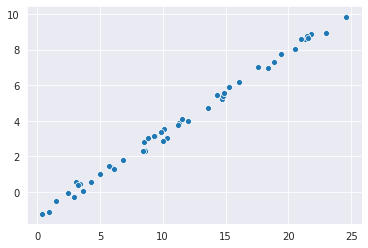

In [49]:
_, ax = plt.subplots()
sns.scatterplot(X[:, 0], y[:, 0], ax=ax)
plt.show()

In [51]:
kernel = gp.kernels.ConstantKernel(1, (1e-1, 1e3)) * gp.kernels.RBF(10, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.2, normalize_y=True)

In [52]:
model.fit(X_train, y_train)
params = model.kernel.get_params()

In [56]:
y_pred, std = model.predict(X_test, return_std=True)

In [61]:
np.mean((y_pred - y_test)**2)

0.0547810136300792